In [1]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D
import os

%matplotlib inline
np.random.seed(12)

In [2]:
data_dir = pathlib.Path('s82j8dh4rr-1')
train = 's82j8dh4rr-1'

In [3]:
dataset_path_dir = os.listdir(data_dir)
print(dataset_path_dir)
print('Label : ', len(dataset_path_dir))

['Belimbing Wuluh', 'Jambu Biji', 'Kemangi', 'Seledri', 'Sirih', 'Lidah Buaya', 'Jeruk Nipis', 'Nangka', 'Pepaya', 'Pandan']
Label :  10


In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print('Image Count : ', image_count)

Image Count :  3500


In [5]:
batch_size = 32
img_height = 224
img_width = 224

In [6]:
train_data = image_dataset_from_directory(data_dir, seed=123, image_size=(img_height, img_width),
                                        validation_split=0.2, subset='training')

Found 3500 files belonging to 10 classes.
Using 2800 files for training.
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-01-10 23:52:42.940945: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-10 23:52:42.941619: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
val_data = image_dataset_from_directory(data_dir, seed=123, image_size=(img_height, img_width),
                                        validation_split=0.2, subset='validation')

Found 3500 files belonging to 10 classes.
Using 700 files for validation.


In [8]:
test_data = image_dataset_from_directory(data_dir, seed=123, image_size=(img_height, img_width),
                                        validation_split=None)

Found 3500 files belonging to 10 classes.


In [9]:
for image_batch, labels_batch in train_data.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

2023-01-10 23:52:43.336149: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


(32, 224, 224, 3)
(32,)


In [10]:
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(16, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))

In [11]:
model.compile(optimizer='adam',
            loss=SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 activation (Activation)     (None, 224, 224, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 activation_1 (Activation)   (None, 112, 112, 32)      0         
                                                        

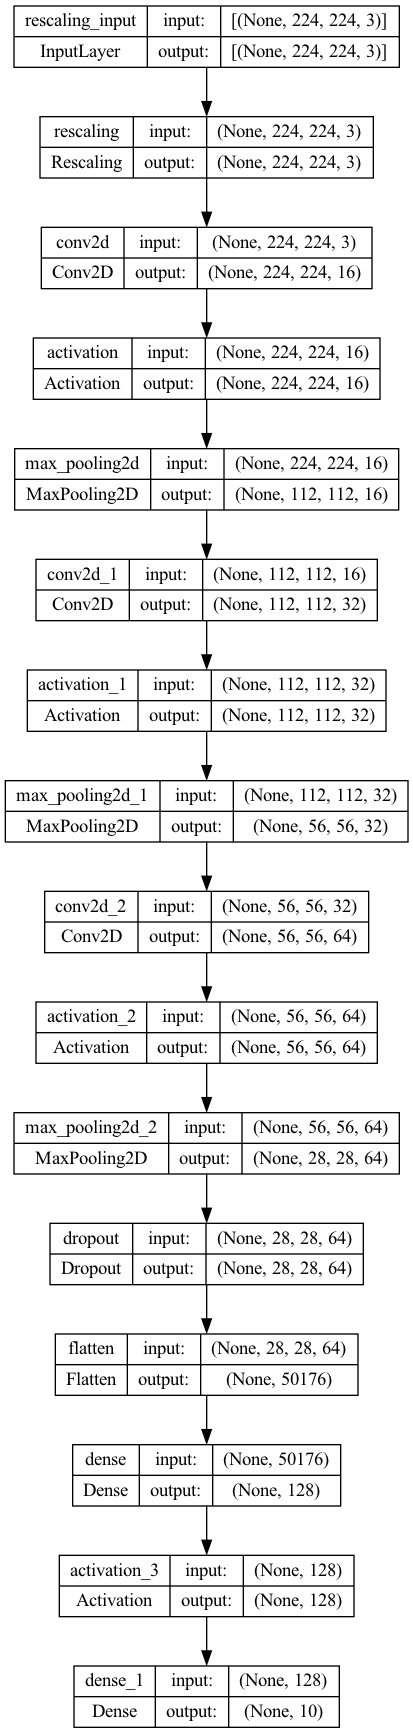

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

In [14]:
history = model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10


2023-01-10 23:52:45.246218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


88/88 [==============================] - ETA: 0s - loss: 1.7664 - accuracy: 0.3800

2023-01-10 23:52:57.846415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


88/88 [==============================] - 15s 155ms/step - loss: 1.7664 - accuracy: 0.3800 - val_loss: 1.1218 - val_accuracy: 0.6071
Epoch 2/10
88/88 [==============================] - 14s 153ms/step - loss: 0.9255 - accuracy: 0.6725 - val_loss: 0.9918 - val_accuracy: 0.6729
Epoch 3/10
88/88 [==============================] - 14s 152ms/step - loss: 0.5948 - accuracy: 0.7896 - val_loss: 0.6675 - val_accuracy: 0.7786
Epoch 4/10
88/88 [==============================] - 14s 153ms/step - loss: 0.3484 - accuracy: 0.8825 - val_loss: 0.5962 - val_accuracy: 0.8171
Epoch 5/10
88/88 [==============================] - 14s 153ms/step - loss: 0.1893 - accuracy: 0.9425 - val_loss: 0.5877 - val_accuracy: 0.8271
Epoch 6/10
88/88 [==============================] - 14s 154ms/step - loss: 0.1316 - accuracy: 0.9575 - val_loss: 0.6520 - val_accuracy: 0.8114
Epoch 7/10
88/88 [==============================] - 14s 156ms/step - loss: 0.0905 - accuracy: 0.9714 - val_loss: 0.6813 - val_accuracy: 0.8357
Epoch 8/10

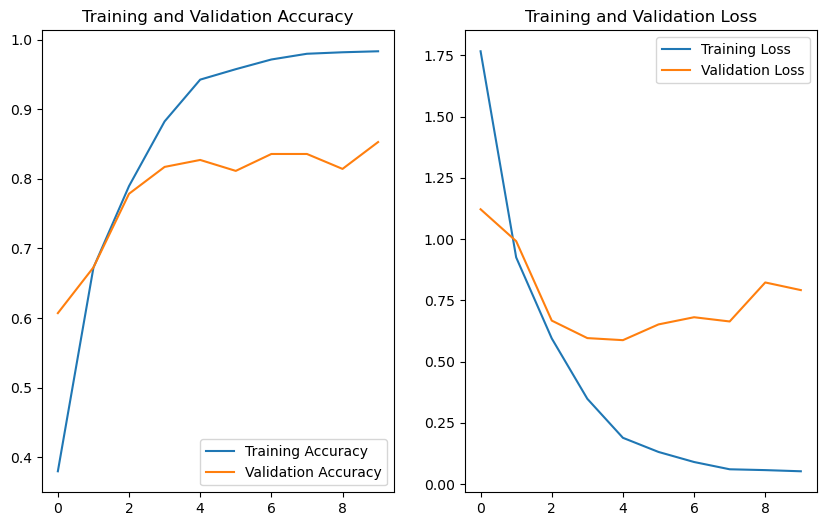

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
performance = model.evaluate(val_data)

22/22 [==============================] - 2s 59ms/step - loss: 0.7920 - accuracy: 0.8529


actual label: Lidah Buaya
1/1 [==============================] - 0s 92ms/step
predicted label: Lidah Buaya


2023-01-10 23:55:10.151858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


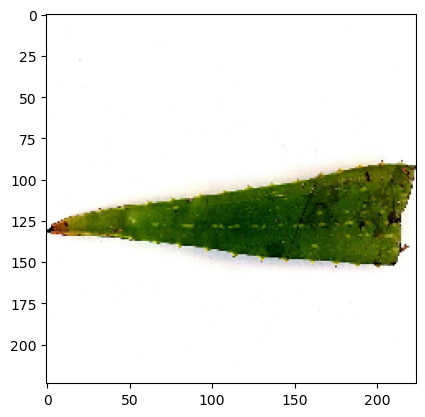

In [17]:
labels = train_data.class_names
labels
for images_batch, labels_batch in test_data.take(1):
    
    image = images_batch[0].numpy().astype('uint8')
    label = labels_batch[0].numpy()
    
    plt.imshow(image)
    print("actual label:", labels[label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:", labels[np.argmax(batch_prediction[0])])

In [18]:
from tensorflow import expand_dims

def predict(model, img):
    
    img_array = img.numpy()
    img_array = expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = labels[np.argmax(predictions[0])]
    confidence = round( (np.max(predictions[0])), 2)
    
    return predicted_class, confidence

1/1 [==============================] - 0s 10ms/step


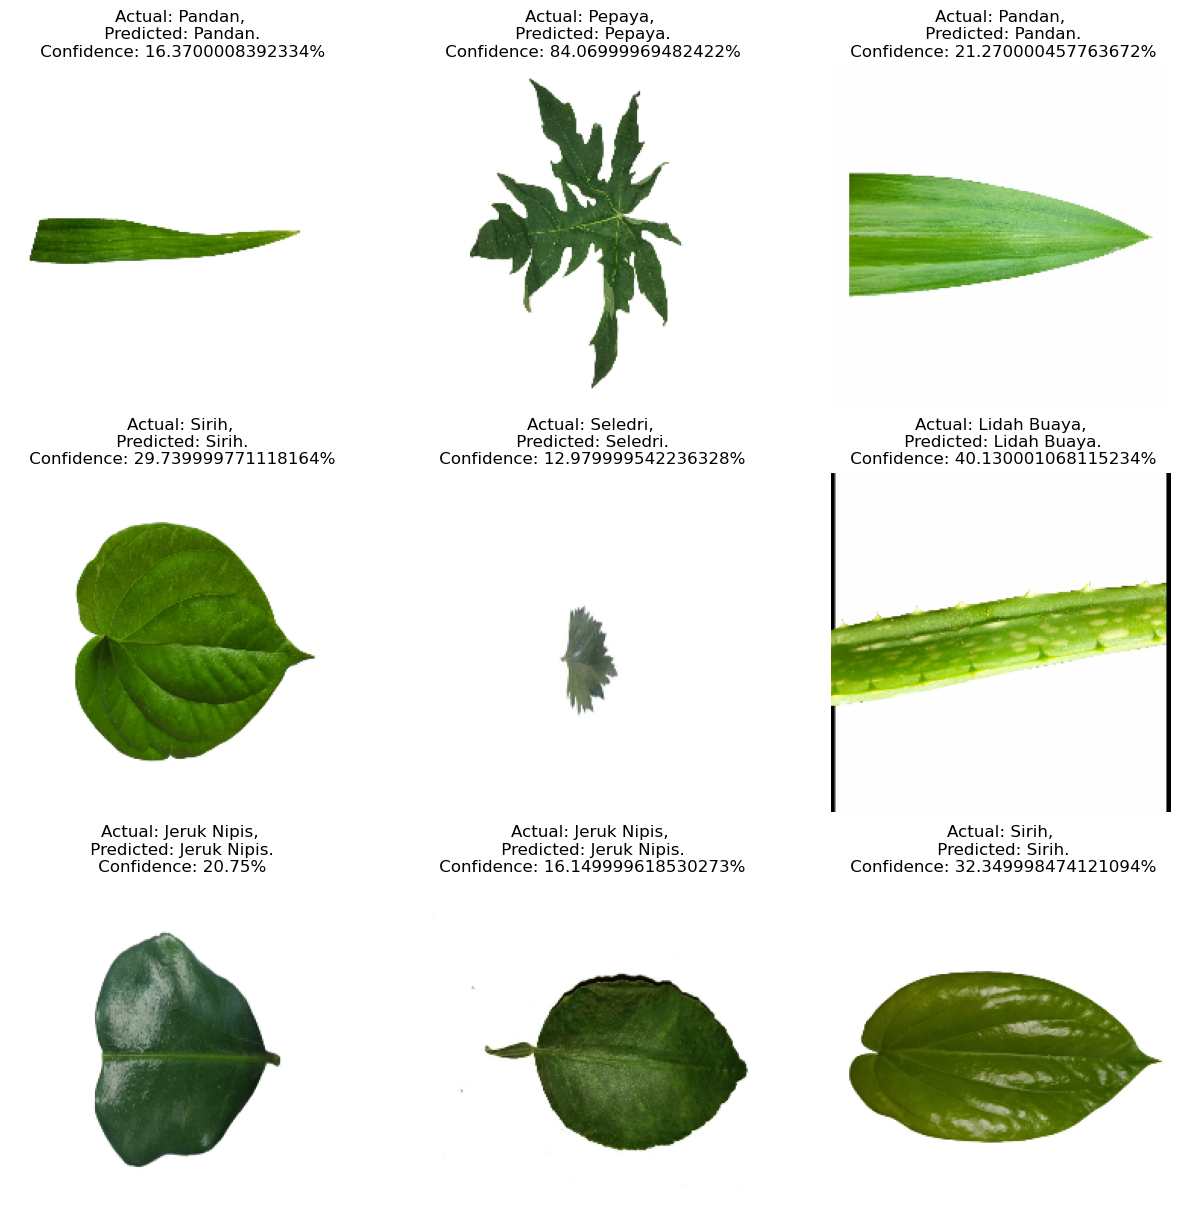

In [20]:
plt.figure(figsize=(15, 15))

for images, lbs in val_data.take(1):
    for i in range(9):
        
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint32"))
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = labels[lbs[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
model.save('model-CNN.h5')